In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
all_data = pd.concat([train.drop(labels='Survived', axis=1), test], ignore_index=True)

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### Age and Fare


/tmp/ipykernel_20/3146360470.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=all_data, x='Age', y='Fare', hue='Pclass', ax=axs[1], palette=palette)
/tmp/ipykernel_20/3146360470.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=all_data, x='Age', y='Fare', hue='Embarked', ax=axs[2], palette=palette)


<AxesSubplot: xlabel='Age', ylabel='Fare'>

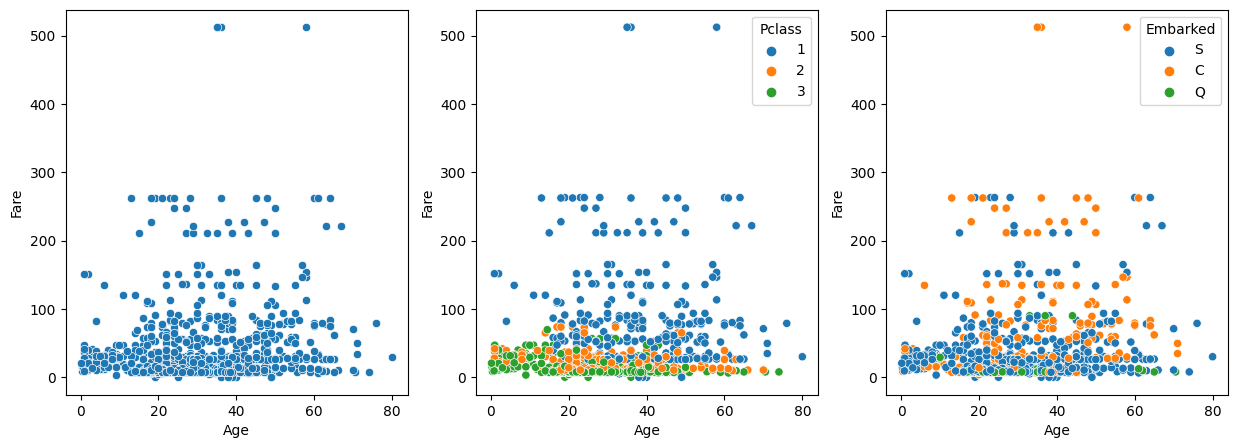

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

palette = sns.color_palette()
sns.scatterplot(data=all_data, x='Age', y='Fare', ax=axs[0])
sns.scatterplot(data=all_data, x='Age', y='Fare', hue='Pclass', ax=axs[1], palette=palette)
sns.scatterplot(data=all_data, x='Age', y='Fare', hue='Embarked', ax=axs[2], palette=palette)


<AxesSubplot: xlabel='Age', ylabel='Fare'>

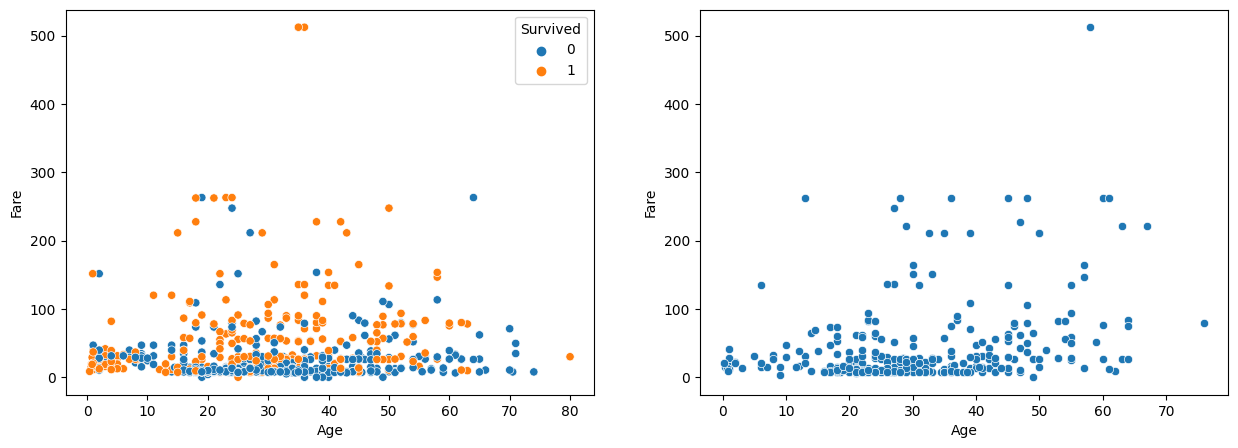

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', ax=axs[0])
sns.scatterplot(data=test, x='Age', y='Fare', ax=axs[1])

In [6]:
df = all_data.isnull().sum()
df[df > 0]

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Pcalss

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


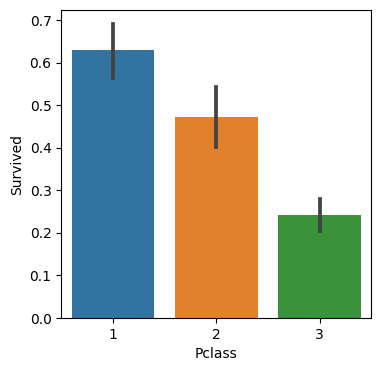

In [7]:
df = pd.crosstab(train.Pclass, train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=train, x='Pclass', y='Survived')
plt.show()

### Sex

Survived,0,1
Sex,,
female,81,233
male,468,109


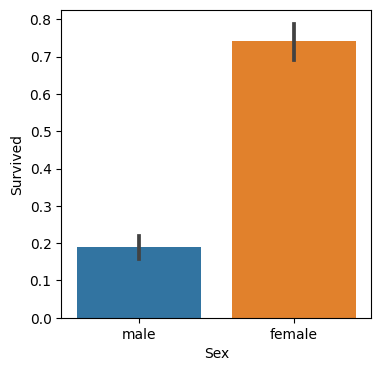

In [8]:
df = pd.crosstab(train.Sex, train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=train, x='Sex', y='Survived')
plt.show()

### Embarked

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


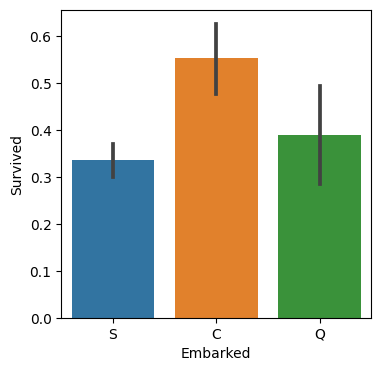

In [9]:
df = pd.crosstab(train.Embarked, train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=train, x='Embarked', y='Survived')
plt.show()

In [10]:
all_data[all_data['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
all_data.loc[all_data['Embarked'].isnull(), 'Embarked'] = 'S'

### Fare
There is one entry with a value of 'NaＮ'.

In [12]:
all_data[all_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


The **correlation** between **Fare** and **Pclass** is the highest.

In [13]:
all_data.corr(numeric_only=True).abs()['Fare'].sort_values(ascending=False).to_frame().style.background_gradient(cmap='Reds')

,Fare
Fare,1.000000
Pclass,0.558629
Parch,0.221539
Age,0.178740
SibSp,0.160238
PassengerId,0.031428


Since Fare is **skewed** within Pclass 3, the **mode** is used to fill in the missing values.

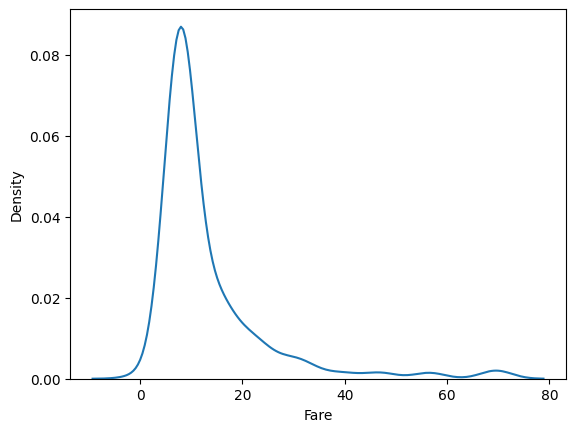

In [14]:
class_3_fare = all_data[(all_data['Pclass'] == 3)].astype({'Fare': float})
sns.kdeplot(data=class_3_fare, x='Fare')

all_data.Fare.fillna(class_3_fare['Fare'].mode()[0], inplace=True)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

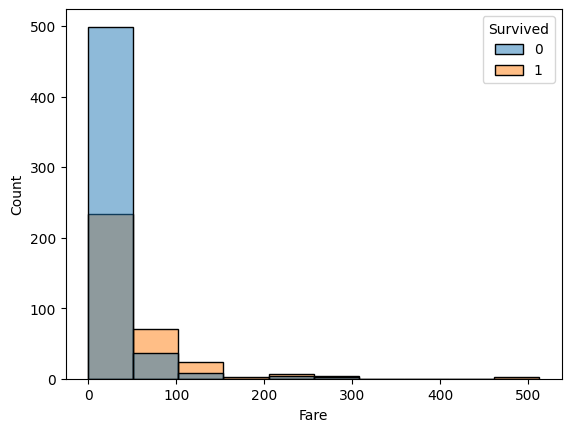

In [15]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=10)

### Name
擷取 Title 欄位，通常用於表示人的稱謂或頭銜

- Mr.：先生，用於成年男性。
- Miss.：小姐，用於未婚女性。
- Mrs.：太太，用於已婚或成年女性。
- Master.：少爺，用於未成年男性。
- Rev.：牧師，用於聖職人員。
- Dr.：博士，用於具有博士學位的人。
- Col.：上校，用於軍階。
- Mlle.：小姐，用於未婚女性（法語中的稱謂）。
- Major.：少校，用於軍階。
- Ms.：女士，用於成年女性，不指明其婚姻狀況。
- Lady.：貴婦人，通常用於貴族或高社會地位的女性。
- Sir.：爵士，通常用於騎士或被授予榮譽稱號的男性。
- Mme.：夫人，用於已婚或成年女性（法語中的稱謂）。
- Don.：先生，用於具有高社會地位或貴族稱號的男性（西班牙語中的稱謂）。
- Capt.：船長，用於船隻的船長或軍階。
- the：用於具有特殊地位或稱號的人，如"The Queen"。
- Jonkheer.：男爵，用於荷蘭貴族稱號。
- Dona.：女士，用於具有高社會地位或貴族稱號的女性（西班牙語中的稱謂）。

In [16]:
all_data['Title'] = all_data.Name.str.split(',', n=2, expand=True)[1].str.split(n=1, expand=True)[0]

### Age 


<AxesSubplot: xlabel='Age', ylabel='Density'>

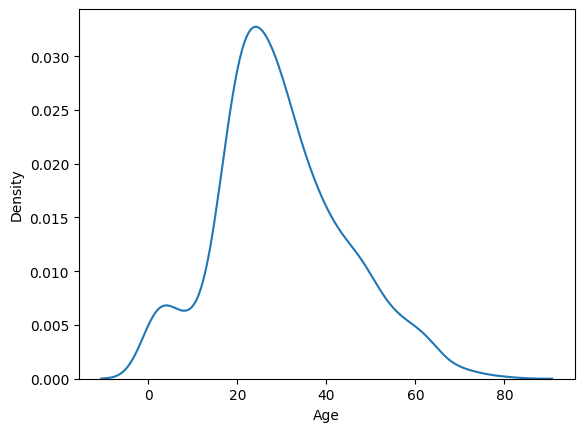

In [17]:
sns.kdeplot(all_data[all_data.Age.notna()], x='Age')

利用不同 title 的 mean 來填補 NaN

In [18]:
title_mean_age = all_data.groupby('Title')['Age'].mean().round(decimals=1)
display(title_mean_age.to_frame().T)

Title,Capt.,Col.,Don.,Dona.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
Age,70.0,54.0,40.0,39.0,43.6,38.0,48.0,48.5,5.5,21.8,24.0,24.0,32.3,37.0,28.0,41.2,49.0,33.0


In [19]:
titles = all_data.Title.unique()
for title in titles:
    all_data.loc[(all_data['Title'] == title) & all_data['Age'].isnull(), 'Age'] = title_mean_age[title]

<AxesSubplot: xlabel='Age', ylabel='Count'>

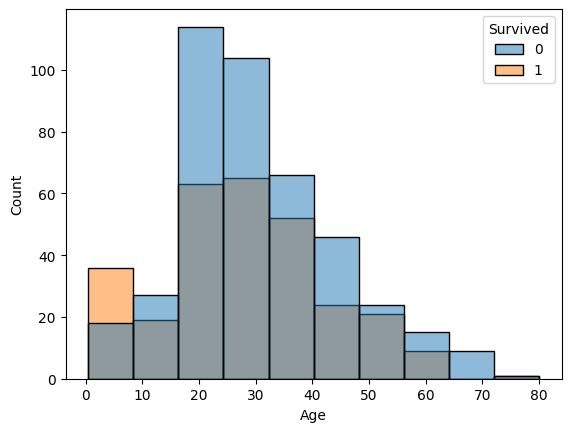

In [20]:
sns.histplot(data=train, x='Age', hue='Survived', bins=10)

### SibSp

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


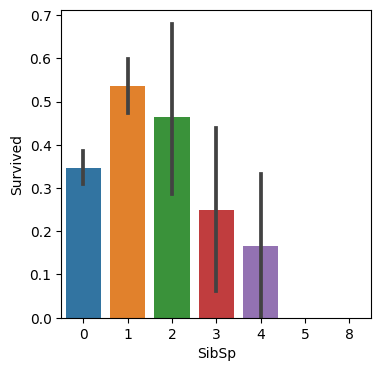

In [21]:
df = pd.crosstab(train.SibSp, train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=train, x='SibSp', y='Survived')
plt.show()

### Parch

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


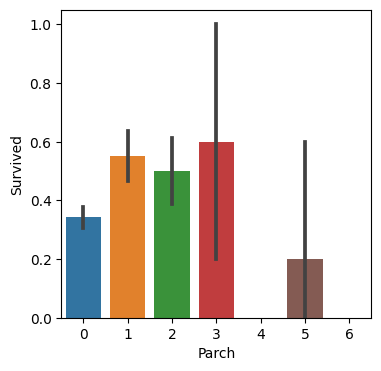

In [22]:
df = pd.crosstab(train.Parch, train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=train, x='Parch', y='Survived')
plt.show()


### Relatives

Survived,0,1
Relatives,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


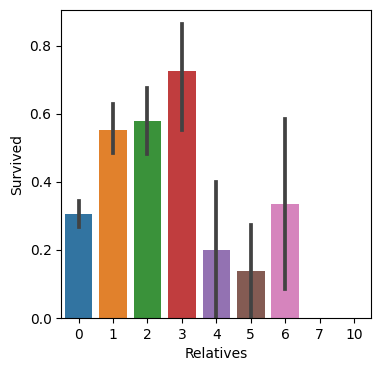

In [23]:
data = train.copy()
data['Relatives'] = data['SibSp'] + data['Parch']
df = pd.crosstab([data.Relatives], train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=data, x='Relatives', y='Survived')
plt.show()

all_data['Relatives'] = all_data['SibSp'] + all_data['Parch']

### Ticket

Survived,0,1
TicketGroup,,
1,384,163
2,80,108
3,19,44
4,22,22
5,10,0
6,18,0
7,16,5


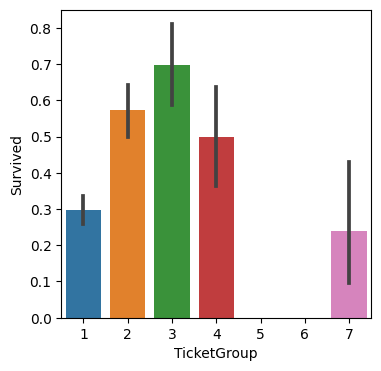

In [24]:
data = train.copy()
data['TicketGroup'] = data.groupby('Ticket')['Ticket'].transform('count')
df = pd.crosstab([data.TicketGroup], train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=data, x='TicketGroup', y='Survived')
plt.show()


all_data['TicketGroup'] = all_data.groupby('Ticket')['Ticket'].transform('count')

### Cabin

Survived,0,1
HasCabin,,
False,481,206
True,68,136


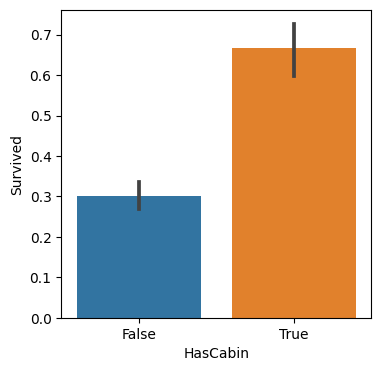

In [25]:
data = train.copy()
data['HasCabin'] = ~all_data['Cabin'].isnull()
df = pd.crosstab(data.HasCabin, train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=data, x='HasCabin', y='Survived')
plt.show()

all_data['HasCabin'] = ~all_data['Cabin'].isnull()

### Deck

Survived,0,1
Deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0


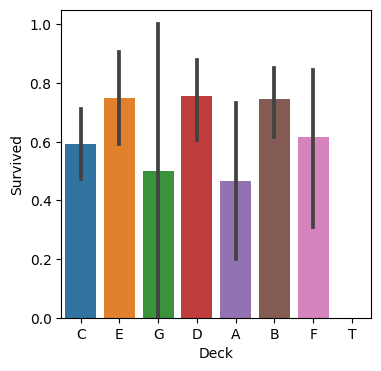

In [26]:
data = train.copy()
data['Deck'] = np.where(~data['Cabin'].isnull(), data['Cabin'].str.slice(stop=1), np.nan)
df = pd.crosstab(data.Deck, train.Survived).style.background_gradient(cmap='Blues', axis=1)
display(df)

plt.figure(figsize=(4,4))
sns.barplot(data=data, x='Deck', y='Survived')
plt.show()

all_data['Deck'] = np.where(~all_data['Cabin'].isnull(), all_data['Cabin'].str.slice(stop=1), np.nan)
# train = pd.concat([total_data[0:891], train[['Survived']]], axis=1)

# sns.countplot(data=train, x='Deck', hue='Survived', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

In [27]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,TicketGroup,HasCabin,Deck
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,1,False,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,2,True,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,1,False,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1,2,True,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,1,False,NaN


將浮點數欄位進行分組在特徵工程中可以有助於提升機器學習的性能，具體取決於數據的性質和特定的應用場景。下面是一些可能的情況：
- 創建類別型特徵：將連續的浮點數值轉換為離散的類別型特徵，可以幫助模型捕捉不同數值範圍的差異。這種分組可以提供對數據的更好解釋性，並且在某些情況下能夠捕捉到非線性關係。
- 減少數據的噪聲和異常值的影響：將浮點數值分組可以減少數據中噪聲和異常值對模型的影響。通過將數據分組，模型將更關注每個分組的整體模式，而不是單個數值的具體數值。
- 解決過擬合：對於樣本數較少的情況，特別是在高維數據集中，將浮點數值進行分組可以減少模型對數據的過擬合。通過將數據分組，模型將專注於學習分組之間的模式，而不是過多關注個別的數值。

在進行分組時，可以考慮以下策略：
- 等頻分組 (Fixed-width binning)：將數據分為等頻率的區間。這種分組策略可以確保每個區間內具有相同數量的數據點，從而平均地捕捉數據的分佈。
- 等寬分組 (Quantile-based binning)：將數據平均分為固定寬度的區間。這種分組策略可以確保每個區間具有相同的寬度，但可能導致某些區間內的數據點數量不均勻。

**不過對於隨機森林顯著不大**

# Encoding

In [28]:
total_data = all_data.copy()

total_data = total_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title', 'Deck'], axis=1)
total_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,TicketGroup,HasCabin
0,3,male,22.0,1,0,7.2500,S,1,1,False
1,1,female,38.0,1,0,71.2833,C,1,2,True
2,3,female,26.0,0,0,7.9250,S,0,1,False


### One-Hot Encoding

In [29]:
total_data = pd.get_dummies(total_data, columns=['Pclass', 'Sex', 'Embarked'])
display(total_data.head(3))

,Age,SibSp,Parch,Fare,Relatives,TicketGroup,HasCabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,1,False,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,2,True,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,1,False,0,0,1,1,0,0,0,1


In [30]:
# from sklearn.preprocessing import LabelEncoder

# total_data['Sex'] = LabelEncoder().fit_transform(total_data['Sex'])
# display(total_data.head(3))

# Model

In [31]:
from sklearn.feature_selection import mutual_info_classif

drop_features = []
features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'HasCabin',
            'TicketGroup',
           ]
y = train['Survived']
x_train = total_data[0:891][features].drop(drop_features, axis=1)
mi_scores =mutual_info_classif(x_train, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
display(mi_scores.to_frame())

,MI Scores
Sex_male,0.145783
Fare,0.134769
Sex_female,0.125299
Pclass_3,0.050970
Pclass_1,0.048541
TicketGroup,0.047501
Age,0.040064
HasCabin,0.027771
SibSp,0.021431
Pclass_2,0.015565


In [32]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(pd.DataFrame(rf_scores, columns=depth_list, index=est_list), annot=True, fmt='.4g')


In [33]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

drop_features = []
import random

# for i in range(100):
#     features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'HasCabin',
# #                 'TicketGroup',
#                ]
#     # features = ['Sex_female', 'Pclass_3', 'SibSp', 'Age', 'Fare', 'HasCabin', 'Pclass_2', 'Sex_male', 'Pclass_1', 'Parch']
#     random.shuffle(features)
#     print(features)
#     features = [x for x in features if x not in drop_features]
#     y = train['Survived']
#     x_train = total_data[0:891][features].drop(drop_features, axis=1)
#     x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, train_size=0.7, random_state=1)
#     x_test = total_data[891:][features].drop(drop_features, axis=1)

#     # display(x_train.head())

#     est_list = [200, 220, 240, 260, 280, 300]
#     depth_list = [7]
#     rf_scores = []
#     show = False
#     for n in est_list:
#         n_scores = []
#         for d in depth_list:
#     #         print(n, d)
#             rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1, )
#             rf.fit(x_train, y_train)
#     #         print(f'train score: {rf.score(x_train, y_train)}') # 0.9036918138041734
#             rf.predict(x_valid)
#     #         print(f'valid score: {rf.score(x_valid, y_valid)}') # 0.7947761194029851
#             score = rf.score(x_valid, y_valid)
#             if score > 0.795:
#                 show = True
#             n_scores.append(score)
#     #         perm = PermutationImportance(rf, random_state=1).fit(x_train, y_train)
#     #         display(eli5.show_weights(perm, feature_names = features, top=len(features)))
#         rf_scores.append(n_scores)

#     if show:
#         plt.figure(figsize=(12, 6))
#         sns.heatmap(pd.DataFrame(rf_scores, columns=depth_list, index=est_list), annot=True, fmt='.4g')
#         plt.show()

# ddd

features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'HasCabin']
features = [x for x in features if x not in drop_features]
y = train['Survived']
x_train = total_data[0:891][features].drop(drop_features, axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, train_size=0.7, random_state=1)
x_test = total_data[891:][features].drop(drop_features, axis=1)
    
# min_split = [2,4,6,8,10,12,14,16,18,20]
# min_leaf = [1, 2,4,6,8,10,12,14,16,18,20]
# for leaf in min_leaf:
#     for split in min_split:
#         print(leaf, split)
#         rf = RandomForestClassifier(n_estimators=220, max_depth=7, random_state=1, min_samples_split=split, min_samples_leaf=leaf)
#         rf.fit(x_train, y_train)
#         print(f'train score: {rf.score(x_train, y_train)}') # 0.9036918138041734
#         rf.predict(x_valid)
#         print(f'valid score: {rf.score(x_valid, y_valid)}') # 0.7947761194029851

rf = RandomForestClassifier(n_estimators=220, max_depth=7, random_state=1, min_samples_split=4, min_samples_leaf=1)
rf.fit(x_train, y_train)
print(f'train score: {rf.score(x_train, y_train)}') # 0.9036918138041734
rf.predict(x_valid)
print(f'valid score: {rf.score(x_valid, y_valid)}') # 0.7947761194029851

        
import eli5
from eli5.sklearn import PermutationImportance

is_test = True
if is_test:
    perm = PermutationImportance(rf, random_state=1).fit(x_train, y_train)
    display(eli5.show_weights(perm, feature_names = features, top=len(features)))

#     fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 5))
#     for i in range(len(['Age', 'FareGroup', 'SibSp', 'Parch'])):
#         PartialDependenceDisplay.from_estimator(rf, x_train, [features[i]], ax=axs[i])
#     plt.show()
    
    # Export the first three decision trees from the forest
    # Tree Visualisation
#     from sklearn.tree import export_graphviz
#     from IPython.display import Image
#     import graphviz

#     for i in range(3):
#         tree = rf.estimators_[i]
#         dot_data = export_graphviz(tree,
#                                    feature_names=x_train.columns,  
#                                    filled=True,  
#                                    max_depth=5, 
#                                    impurity=False, 
#                                    proportion=False)
#         graph = graphviz.Source(dot_data)
#         display(graph)


# 做預測
predictions = rf.predict(x_test)
print(predictions)

output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)

train score: 0.8908507223113965
valid score: 0.7985074626865671


Weight,Feature
0.0870 ± 0.0065,Age
0.0738 ± 0.0124,Sex_male
0.0437 ± 0.0148,Sex_female
0.0350 ± 0.0119,Pclass_3
0.0302 ± 0.0110,Fare
0.0132 ± 0.0047,SibSp
0.0090 ± 0.0026,HasCabin
0.0087 ± 0.0044,Pclass_2
0.0074 ± 0.0060,Parch
0.0048 ± 0.0035,Pclass_1


[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]
